In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Test 1

We have a 2D domain with a constant zonal and zero meridional wind stress. We assume that the only non-zero terms in the Navier Stokes equations are the Coriolis and forcing terms. We have analytical solutions for the same, and by performing a numerical simulation for two time steps, we hope to match these results with analytical solutions.

The two equations are:

$$\frac{\partial (u_m h_m)}{\partial t} = \frac{\tau_x}{\rho_0} + fv_m h_m,$$
$$\frac{\partial (v_m h_m)}{\partial t} = \frac{\tau_y}{\rho_0} - fu_m h_m.$$

We simulate these equations for two time steps. After doing an initial analysis with t = 20 seconds, $u_m = 1.3 \times 10^{-5} m/s$ and $v_m = -9.46 \times 10^{-9} m/s$. These results match the analytical results, so we conclude that the coriolis and wind stress functions are correct.

In [6]:
Lx,Ly = 4100,4000
nx,ny = 52,50
dx,dy = Lx/nx,Ly/ny

g = 9.81
rho0 = 1025
r0 = 6.378*10**6
day = 24*60*60 # length of day [seconds]
omega = 2*np.pi / day
f = 2*omega*np.sin(np.deg2rad(30))

xu_ocean = np.linspace(0,Lx,nx,dtype = float)
yu_ocean = np.linspace(0,Ly,ny,dtype = float)
Y,X = np.meshgrid(yu_ocean,xu_ocean)

In [14]:
tau_x = 0.05*np.ones((nx,ny))
tau_y = np.zeros((nx,ny))
MLD_0 = -150*np.ones((nx,ny))

In [15]:
def forcing_Euler(tau,hm_new):
    f3 = tau/(rho0*hm_new)
    return f3

def cor_Euler(vel,hm_old,hm_new):
    f3 = -(1/hm_new)*f*vel*hm_old
    return f3

In [16]:
um_old = np.zeros((nx,ny))
um_new = np.zeros((nx,ny))
vm_old = np.zeros((nx,ny))
vm_new = np.zeros((nx,ny))
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 40
dt = 20
for t in np.arange(t_start,t_end,dt):
    um_new = um_old + dt*forcing_Euler(tau_x,hm_new) + dt*cor_Euler(-vm_old,hm_old,hm_new)
    vm_new = vm_old + dt*forcing_Euler(tau_y,hm_new) + dt*cor_Euler(um_old,hm_old,hm_new)
    
    um_old = um_new
    vm_old = vm_new
    
    print(t/dt)

0.0
1.0


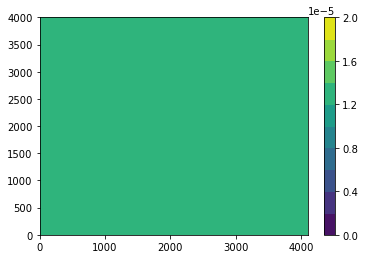

In [17]:
plt.contourf(X,Y,um_new,levels = np.linspace(0,2e-5,11))
plt.colorbar()

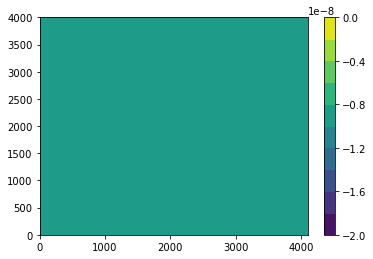

In [22]:
plt.contourf(X,Y,vm_new,levels = np.linspace(-2e-8,0,11))
plt.colorbar()